In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

df = pd.read_csv('banking.csv')

y = df.y
df.drop(['y'],axis=1, inplace=True)
x = df[[colu for colu in df.columns if df[colu].dtype in ['int64','float64']]]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)
LogisticRegression()


C:\python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred = log_regression.predict(X_test)
cnf_metrix = metrics.confusion_matrix(y_test, y_pred)
cnf_metrix

array([[10654,   270],
       [  877,   556]], dtype=int64)

<AxesSubplot: >

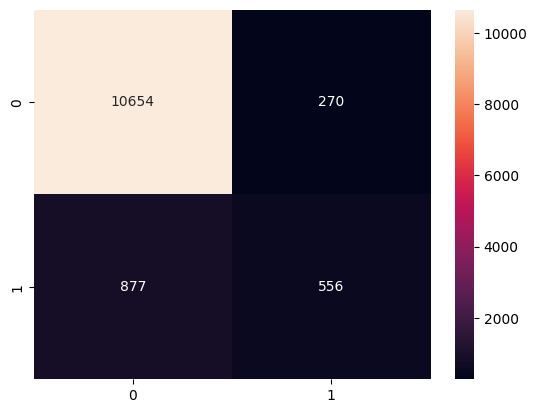

In [36]:
ax = plt.subplot()
sns.heatmap(cnf_metrix, annot=True, fmt='g', ax=ax)

In [37]:
print('Accurancy:', metrics.accuracy_score(y_test, y_pred))

Accurancy: 0.9071781176661002


In [38]:
print('Точність:', metrics.precision_score(y_test, y_pred))

Точність: 0.6731234866828087


In [39]:
print('Повнота:', metrics.recall_score(y_test, y_pred))

Повнота: 0.38799720865317516


In [40]:
print('Повнота:', metrics.f1_score(y_test, y_pred, average=None))

Повнота: [0.94892006 0.49225321]


In [41]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

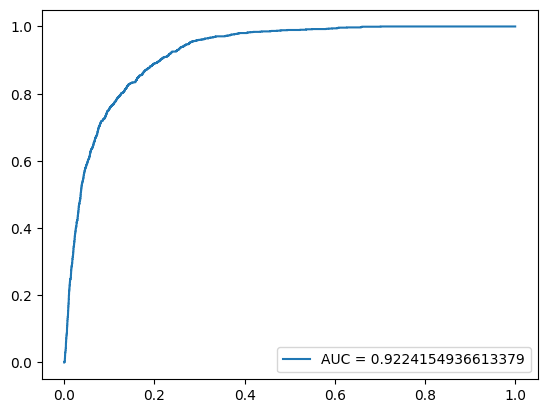

In [42]:
plt.plot(fpr,tpr, label="AUC = "+str(auc))
plt.legend(loc=4)
plt.show()